In [1]:
from Outline_of_DPN_training import DpnTraining
import numpy as np

DATA_FILE_NAME = "trajectory_dict.pickle"
TRAJECTORY_LENGTH = 30 #Approximately 10 seconds
MIDPOINTS = 2 #splits video data into trajectories of length above, but this determines the amount of overlap across trajectories

EPSILON_PERTURBATIONS = False  #if we want the network to predict how to perturb LS vector.
ITERATIONS = 100 #kinda like epochs?
BATCH_SIZE = 10   #Might be the exact same thing as episodes, up for interpretation.
EPISODES = 20     #How many trajectories to explore for a given job. Essentually to get a better estimate of the expected reward.
DISCOUNT = 0.99   #how much to discount the reward
ALPHA = 0.001     #learning rate?
INPUT_SIZE = 20

dpn = DpnTraining(INPUT_SIZE = INPUT_SIZE)

In [2]:
dpn.train(ITERATIONS)

C:\Users\Exiz\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\Exiz\anaconda3\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Iteration 1 Completed with reward: -117.28366355895996 Variance of :2.5330629555967956
Average last avg reward: -4.1905238151550295 last variance avg: 0.5116732947384411
Iteration 2 Completed with reward: -193.37569885253907 Variance of :1.9613202409314192
Average last avg reward: -8.02577006816864 last variance avg: 0.3934446418641028
Iteration 3 Completed with reward: -95.12037887573243 Variance of :2.487856514091668
Average last avg reward: -3.777828407287598 last variance avg: 0.4614498885756897
Iteration 4 Completed with reward: -70.51971893310547 Variance of :2.205559011229595
Average last avg reward: -2.768051040172577 last variance avg: 0.36371670079665647
Iteration 5 Completed with reward: -82.32417488098145 Variance of :2.025688618236413
Average last avg reward: -2.700163948535919 last variance avg: 0.45812276292576093
Iteration 6 Completed with reward: -100.89689674377442 Variance of :1.8843196870401626
Average last avg reward: -2.4981238186359405 last variance avg: 0.355736

Iteration 62 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 63 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 64 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 65 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 66 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 67 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 68 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 69 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 70 Completed with reward: nan Variance of :nan
Average last avg reward: nan last variance avg: nan
Iteration 71 Comple

In [3]:
y1 = dpn.rewards_last
y2 = []
mean = lambda x: sum(x)/len(x)
for i in range(len(y1)):
    if i < 10:
        pass
    else:
        avg = mean(y1[(i-10):i])
        y2.append(avg)
    

In [4]:
import matplotlib.pyplot as plt

In [5]:
mean(y1[0:5])

-4.292467455863952

In [6]:
y2[0:10]

[-3.9097246664762495,
 -3.795239436030387,
 -3.2963748627901084,
 -4.324627359509469,
 -4.2613878327608115,
 -5.393270136713982,
 -6.86261613726616,
 -6.4406073194742195,
 -6.3410701560974125,
 -6.318513611555099]

In [7]:
%matplotlib inline

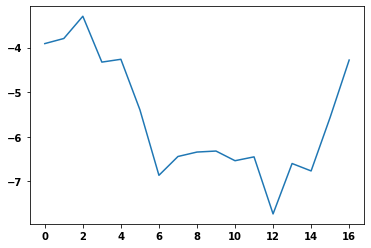

In [8]:
plt.plot(y2)
plt.show()

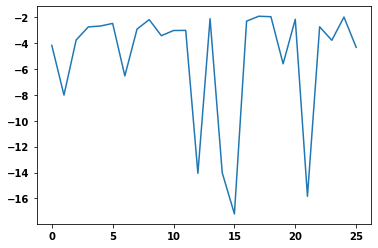

In [9]:
plt.plot(y1)
plt.show()

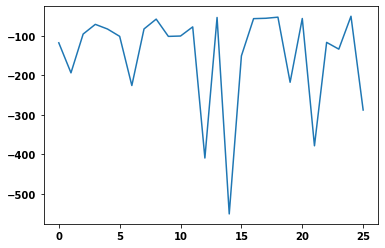

In [10]:
rew = dpn.rewards
plt.plot(rew)
plt.show()

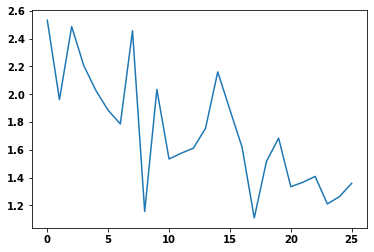

In [11]:
var = dpn.variance
plt.plot(var)
plt.show()